# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [163]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

In [164]:
# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [165]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  new_y = np.column_stack([np.ones_like(x), x]) @ [phi0, phi1]
  return new_y


In [166]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

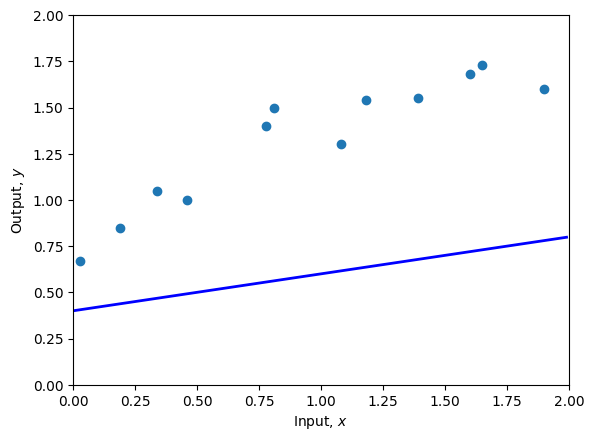

In [167]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [168]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)
  diff = f(x,phi0, phi1) - y
  sq_diff = diff ** 2
  loss = np.sum(sq_diff)
  return loss


In [169]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


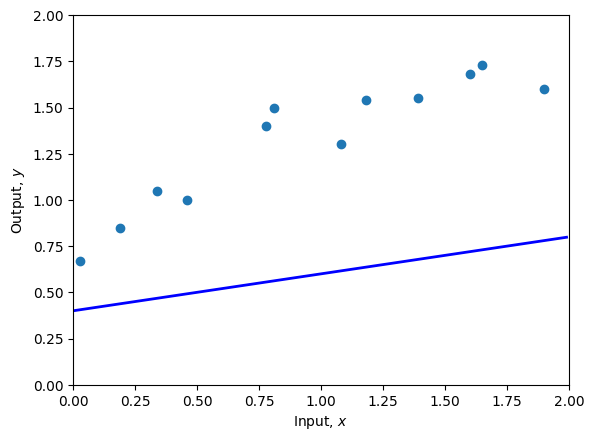

Your Loss = 7.07, Ground truth =10.28


In [170]:
# Set the intercept and slope as in figure 2.2c
# phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

Differentiate the Loss with phi0 and phi1

In [171]:
def dL_dphi1(x, y, phi0, phi1):
    dphi1 = np.sum(2/len(y) * (f(x,phi0, phi1) - y) * x)
    return dphi1

def dL_dphi0(x, y, phi0, phi1):
    dphi0 = np.sum(2/len(y) * (f(x,phi0, phi1) - y))
    return dphi0

print(dL_dphi1(x, y, phi0, phi1))


-1.6162299999999998


# Training & Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

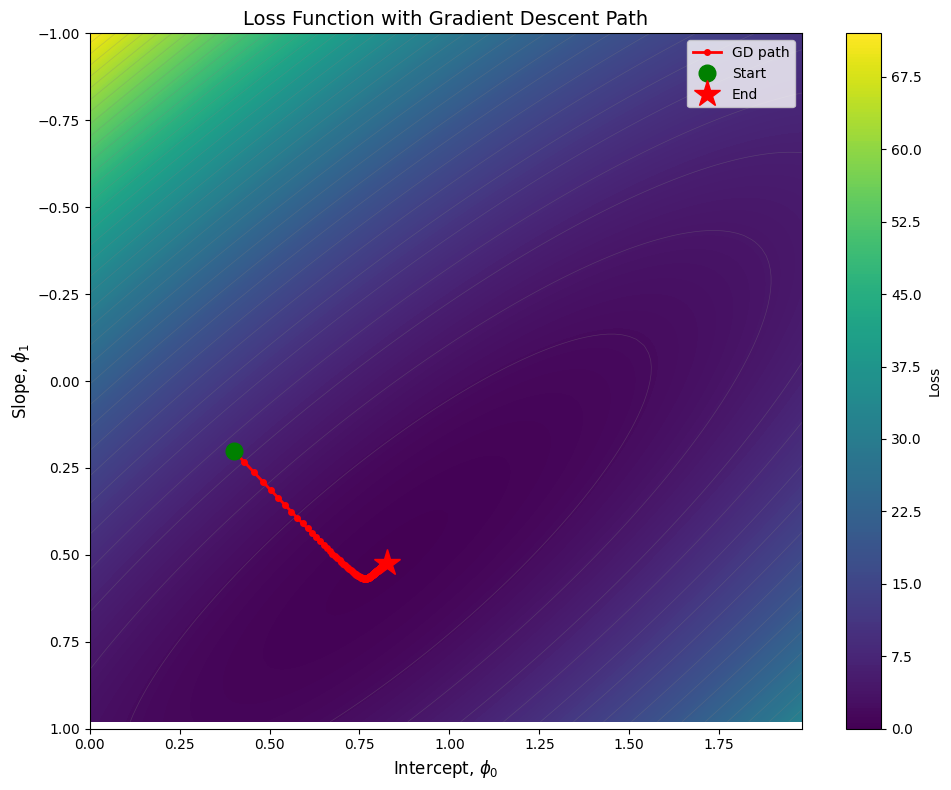

Final Loss = 0.1999
Final parameters: phi0=0.8258, phi1=0.5223


In [178]:
# Store parameter history during gradient descent
phi0_history = [0.4]  # initial value
phi1_history = [0.2]  # initial value

pre_loss = compute_loss(x, y, phi0_history[0], phi1_history[0])
learning_rate = 0.02

for i in range(1000):
    loss = compute_loss(x, y, phi0_history[-1], phi1_history[-1])
    if loss > pre_loss:
        break
    
    dphi0 = dL_dphi0(x, y, phi0_history[-1], phi1_history[-1])
    dphi1 = dL_dphi1(x, y, phi0_history[-1], phi1_history[-1])
    
    phi0_new = phi0_history[-1] - (learning_rate * dphi0)
    phi1_new = phi1_history[-1] - (learning_rate * dphi1)
    
    phi0_history.append(phi0_new)
    phi1_history.append(phi1_new)
    
    pre_loss = loss

# Create loss grid (as you already have)
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0, 2.0, 0.02), np.arange(-1.0, 1.0, 0.02))
all_losses = np.zeros_like(phi1_mesh)

for indices, temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x, y, phi0_mesh[indices], phi1_mesh[indices])

# Plot heatmap with gradient descent path
fig = plt.figure(figsize=(10, 8))
ax = plt.axes()

# Heatmap
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses, levels, cmap='viridis')
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Loss')

# Contour lines
levels_contour = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses, levels_contour, colors='gray', alpha=0.3, linewidths=0.5)

# Plot gradient descent path
ax.plot(phi0_history, phi1_history, 'r.-', linewidth=2, markersize=8, label='GD path')
ax.plot(phi0_history[0], phi1_history[0], 'go', markersize=12, label='Start')
ax.plot(phi0_history[-1], phi1_history[-1], 'r*', markersize=20, label='End')

ax.set_xlabel(r'Intercept, $\phi_0$', fontsize=12)
ax.set_ylabel(r'Slope, $\phi_1$', fontsize=12)
ax.set_title('Loss Function with Gradient Descent Path', fontsize=14)
ax.legend()
ax.set_ylim([1, -1])
plt.tight_layout()
plt.show()

print(f'Final Loss = {compute_loss(x, y, phi0_history[-1], phi1_history[-1]):.4f}')
print(f'Final parameters: phi0={phi0_history[-1]:.4f}, phi1={phi1_history[-1]:.4f}')